In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [2]:
df = pd.read_csv('../data/HOTELS/CITY.csv')
df.head()

,s,o,h,l,c,v,t
0,ok,111.1,122.2,111.1,122.2,376,1686441600
1,ok,120.8,134.4,120.8,134.4,279,1686528000
2,ok,135.7,147.8,135.7,147.8,201,1686614400
3,ok,147.8,162.5,147.8,162.5,167,1686700800
4,ok,165.7,178.7,165.7,178.7,122,1686787200


In [3]:
df.shape

(494, 7)

In [4]:
df = df.rename(columns={'c':'price_1d','t':'datetime'})
df.drop(['s','h','l','v','o'],axis = 1, inplace= True)

In [5]:
# Convert timestamp to datetime (if not done)
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')
df.set_index('datetime', inplace=True)

In [6]:
df.tail(20)

,price_1d
datetime,
2025-07-02,831.99
2025-07-03,829.74
2025-07-06,831.96
2025-07-07,830.53
2025-07-08,833.48
2025-07-09,837.07
2025-07-10,841.31
2025-07-13,854.97
2025-07-14,852.65


In [7]:
# Creating the window size of 5, 10, 15

df['1D_EMA_5'] = df['price_1d'].ewm(span=5, adjust=False).mean()
df['1D_EMA_10'] = df['price_1d'].ewm(span=10, adjust=False).mean()
df['1D_EMA_15'] = df['price_1d'].ewm(span=15, adjust=False).mean()



In [8]:


# Resample the data to weekly frequency, taking the closing price of each week (e.g., last trading day)
df['price_1w'] = df['price_1d'].resample('W-THU').mean()

In [9]:
df.head(20)

,price_1d,1D_EMA_5,1D_EMA_10,1D_EMA_15,price_1w
datetime,,,,,
2023-06-11,122.2,122.200000,122.200000,122.200000,NaN
2023-06-12,134.4,126.266667,124.418182,123.725000,NaN
2023-06-13,147.8,133.444444,128.669421,126.734375,NaN
2023-06-14,162.5,143.129630,134.820436,131.205078,NaN
2023-06-15,178.7,154.986420,142.798538,137.141943,149.12
2023-06-18,196.5,168.824280,152.562440,144.561700,NaN
2023-06-19,216.1,184.582853,164.114724,153.503988,NaN
2023-06-20,237.7,202.288569,177.493865,164.028489,NaN
2023-06-21,261.4,221.992379,192.749526,176.199928,NaN


In [10]:
# Creating the window size of 5, 10, 15

df['1W_EMA_5'] = df['price_1w'].ewm(span=5, adjust=False).mean()
df['1W_EMA_10'] = df['price_1w'].ewm(span=10, adjust=False).mean()
df['1W_EMA_15'] = df['price_1w'].ewm(span=15, adjust=False).mean()



In [11]:
df.tail()

,price_1d,1D_EMA_5,1D_EMA_10,1D_EMA_15,price_1w,1W_EMA_5,1W_EMA_10,1W_EMA_15
datetime,,,,,,,,
2025-07-23,945.92,939.014249,913.618961,896.255830,NaN,859.470550,845.894127,846.009097
2025-07-24,940.45,939.492833,918.497331,901.780101,956.154,928.774616,882.445616,867.592292
2025-07-27,939.41,939.465222,922.299635,906.483838,NaN,928.774616,882.445616,867.592292
2025-07-28,937.13,938.686815,924.996065,910.314608,NaN,928.774616,882.445616,867.592292
2025-07-29,950.20,942.524543,929.578599,915.300282,NaN,928.774616,882.445616,867.592292


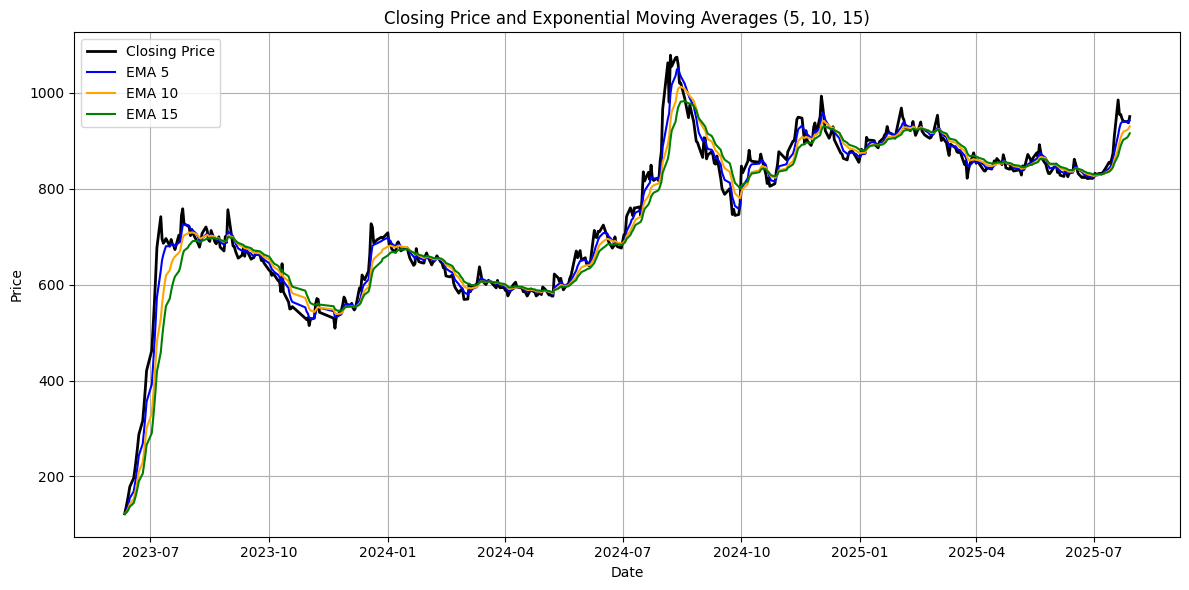

In [12]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price_1d'], label='Closing Price', color='black', linewidth=2)
plt.plot(df.index, df['1D_EMA_5'], label='EMA 5', color='blue', linestyle='-')
plt.plot(df.index, df['1D_EMA_10'], label='EMA 10', color='orange', linestyle='-')
plt.plot(df.index, df['1D_EMA_15'], label='EMA 15', color='green', linestyle='-')

plt.title('Closing Price and Exponential Moving Averages (5, 10, 15)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('./closing_price_and_sma.png')
plt.show()

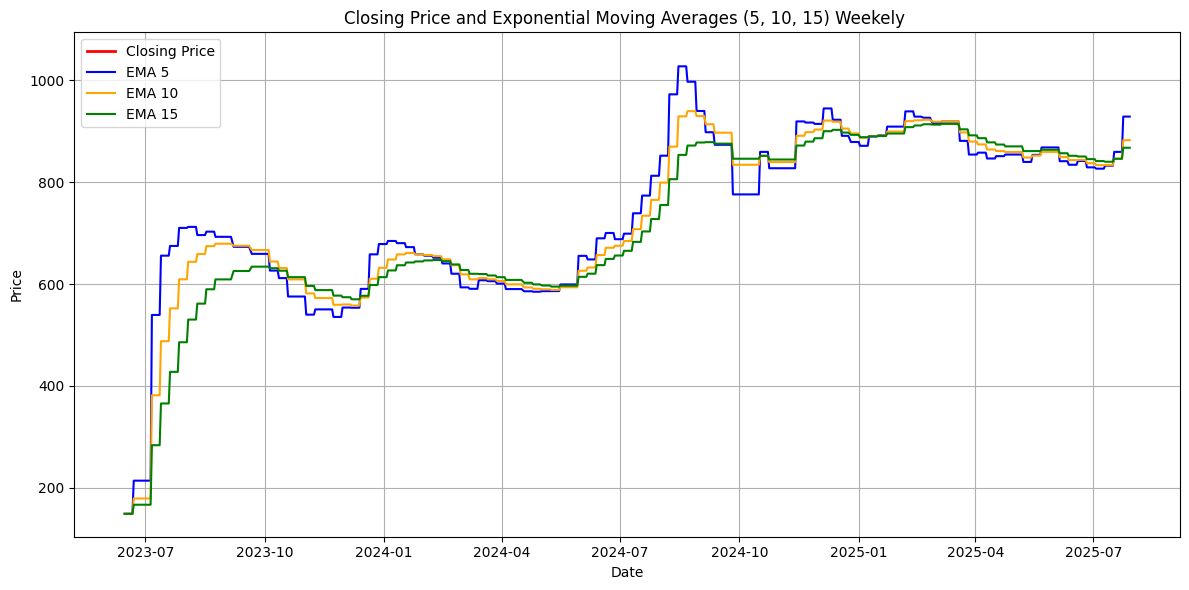

In [13]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price_1w'], label='Closing Price', color='red', linewidth=2,linestyle='-')
plt.plot(df.index, df['1W_EMA_5'], label='EMA 5', color='blue', linestyle='-')
plt.plot(df.index, df['1W_EMA_10'], label='EMA 10', color='orange', linestyle='-')
plt.plot(df.index, df['1W_EMA_15'], label='EMA 15', color='green', linestyle='-')

plt.title('Closing Price and Exponential Moving Averages (5, 10, 15) Weekely ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('./closing_price_and_sma.png')
plt.show()

In [14]:
import glob 

csv_list = glob.glob('../data/*/*.csv')

In [15]:
len(csv_list)

254

In [16]:
stock_list = []

for s in csv_list:
    s_full = (s.split('/')[-1])
    stock_list.append(s_full.split('.')[0])


In [17]:
len(stock_list)

254

In [18]:
csv_list[10]

'../data/Hydropower/AKPL.csv'

In [19]:
def EMA_Calculator(filePath):
    try:
        df = pd.read_csv(filePath)

        symbol = (filePath.split('/')[-1])
        symbol = (symbol.split('.')[0])
        print(f'{symbol} in progress {filePath} ')

        required_cols = {'c', 't'}
        if not required_cols.issubset(df.columns):
            print(f'⚠️ Skipping {symbol} — missing required columns')
            return


        df = df.rename(columns={'c':'price_1d','t':'datetime'})
        df.drop(['s','h','l','v','o'],axis = 1, inplace= True)
        # Convert timestamp to datetime (if not done)
        df['datetime'] = pd.to_datetime(df['datetime'], unit='s')
        df.set_index('datetime', inplace=True)

        # Creating the window size of 5, 10, 15

        df['1D_EMA_5'] = df['price_1d'].ewm(span=5, adjust=False).mean()
        df['1D_EMA_10'] = df['price_1d'].ewm(span=10, adjust=False).mean()
        df['1D_EMA_15'] = df['price_1d'].ewm(span=15, adjust=False).mean()



        # Resample the data to weekly frequency, taking the closing price of each week (e.g., last trading day)
        df['price_1w'] = df['price_1d'].resample('W-THU').mean()

        # Creating the window size of 5, 10, 15

        df['1W_EMA_5'] = df['price_1w'].ewm(span=5, adjust=False).mean()
        df['1W_EMA_10'] = df['price_1w'].ewm(span=10, adjust=False).mean()
        df['1W_EMA_15'] = df['price_1w'].ewm(span=15, adjust=False).mean()

        output_path = f'../cleaned_data/{symbol}.csv'
        df.to_csv(output_path)
        print(f'✅ Saved: {output_path}')

        
    except Exception as e:
        print(f'❌ Error in cleaning: {symbol} — {e}')
        return

    


In [20]:
"""for path in csv_list:
    EMA_Calculator(path)

print('Data Conversion is Sucessfull :)')"""

"for path in csv_list:\n    EMA_Calculator(path)\n\nprint('Data Conversion is Sucessfull :)')"

In [21]:
def calculate_sentiment(symbol_data):
    # get the last week value
    i = -1
    while True:
        val = symbol_data['price_1w'].iloc[i]
        
        if pd.isna(val):  # proper NaN check
            i -= 1
        else:
            price_1w = val
            break


    # Higher TF (1W) Check
    htf_bullish = (price_1w > symbol_data['1W_EMA_5'][-1] > symbol_data['1W_EMA_10'][-1] > symbol_data['1W_EMA_15'][-1])
    htf_bearish = (price_1w < symbol_data['1W_EMA_5'][-1] < symbol_data['1W_EMA_10'][-1] < symbol_data['1W_EMA_15'][-1])
    # Lower TF (1D) Check
    ltf_bullish = (symbol_data['price_1d'][-1] > symbol_data['1D_EMA_5'][-1] > symbol_data['1D_EMA_10'][-1] > symbol_data['1D_EMA_15'][-1])
    ltf_bearish = (symbol_data['price_1d'][-1] < symbol_data['1D_EMA_5'][-1] < symbol_data['1D_EMA_10'][-1] < symbol_data['1D_EMA_15'][-1])
    # Score Calculation
    score = 0
    if htf_bullish and ltf_bullish:
        score = 0.6 * 1 + 0.4 * 1
    # Max bullish
    elif htf_bullish or ltf_bullish:
        score = 0.6 * htf_bullish + 0.4 * ltf_bullish
        
    return {
    'symbol': 'Hotels_and_Tourism' ,#symbol_data['symbol'],
    'score': (score * 100),
    'trend': 'Bullish' if score >= 50 else 'Bearish'}

In [24]:
calculate_sentiment(df)

/tmp/ipykernel_473/2343272608.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  htf_bullish = (price_1w > symbol_data['1W_EMA_5'][-1] > symbol_data['1W_EMA_10'][-1] > symbol_data['1W_EMA_15'][-1])
/tmp/ipykernel_473/2343272608.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  htf_bearish = (price_1w < symbol_data['1W_EMA_5'][-1] < symbol_data['1W_EMA_10'][-1] < symbol_data['1W_EMA_15'][-1])
/tmp/ipykernel_473/2343272608.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

{'symbol': 'Hotels_and_Tourism', 'score': 100.0, 'trend': 'Bearish'}

In [23]:
df.tail()

,price_1d,1D_EMA_5,1D_EMA_10,1D_EMA_15,price_1w,1W_EMA_5,1W_EMA_10,1W_EMA_15
datetime,,,,,,,,
2025-07-23,945.92,939.014249,913.618961,896.255830,NaN,859.470550,845.894127,846.009097
2025-07-24,940.45,939.492833,918.497331,901.780101,956.154,928.774616,882.445616,867.592292
2025-07-27,939.41,939.465222,922.299635,906.483838,NaN,928.774616,882.445616,867.592292
2025-07-28,937.13,938.686815,924.996065,910.314608,NaN,928.774616,882.445616,867.592292
2025-07-29,950.20,942.524543,929.578599,915.300282,NaN,928.774616,882.445616,867.592292
